In [1]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap

# Load the cleaned dataset
file_path = '/content/drive/MyDrive/PROJECTS/Credit Risk Modeling/cleaned_breast_cancer_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,PatientID,Age,CancerStage,CancerType,PrimaryTreatment,SurvivalStatus,RecurrenceStatus,GeographicRegion,AnnualIncome,HealthInsurance,DiagnosisDate,TreatmentEffectiveness
0,1,63.0,III,Ductal,Radiation,1,1,Suburban,82824.0,Yes,2004-01-16,7
1,2,76.0,III,Mixed,Surgery,0,1,Suburban,62752.0,Yes,2017-08-05,6
2,3,53.0,II,Ductal,Hormone Therapy,1,0,Urban,52327.0,Yes,2009-04-30,9
3,4,39.0,I,Mixed,Surgery,1,1,Urban,62070.0,Yes,2001-01-24,6
4,5,67.0,II,Mixed,Surgery,0,0,Urban,60197.0,Yes,2002-09-26,5


In [6]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to numeric (replace with appropriate strategy for your data)
for col in non_numeric_cols:
    # Example: Convert categorical strings to numerical labels
    df[col] = pd.factorize(df[col])[0]

# Calculate the correlation matrix
corr_matrix = df.corr()

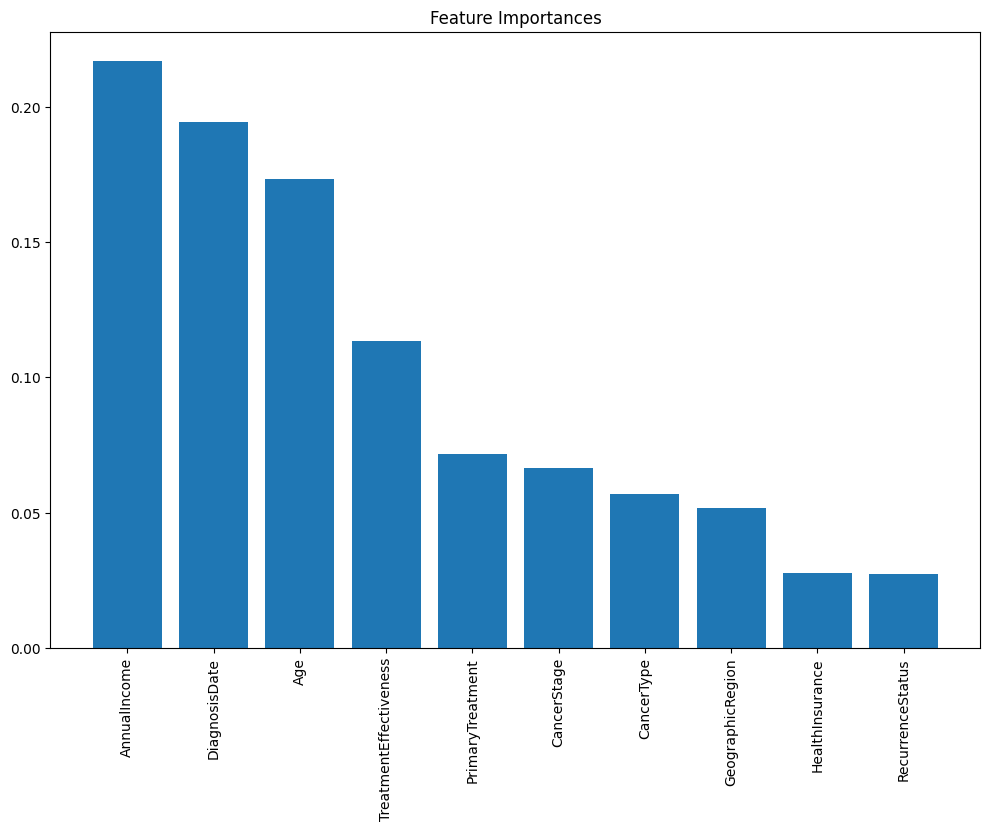

Accuracy on the test set: 0.72


In [7]:
# Prepare data for Random Forest model
X = df.drop(columns=['SurvivalStatus', 'PatientID'])
y = df['SurvivalStatus']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Calculate feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)
print(f'Accuracy on the test set: {accuracy_score(y_test, y_pred):.2f}')


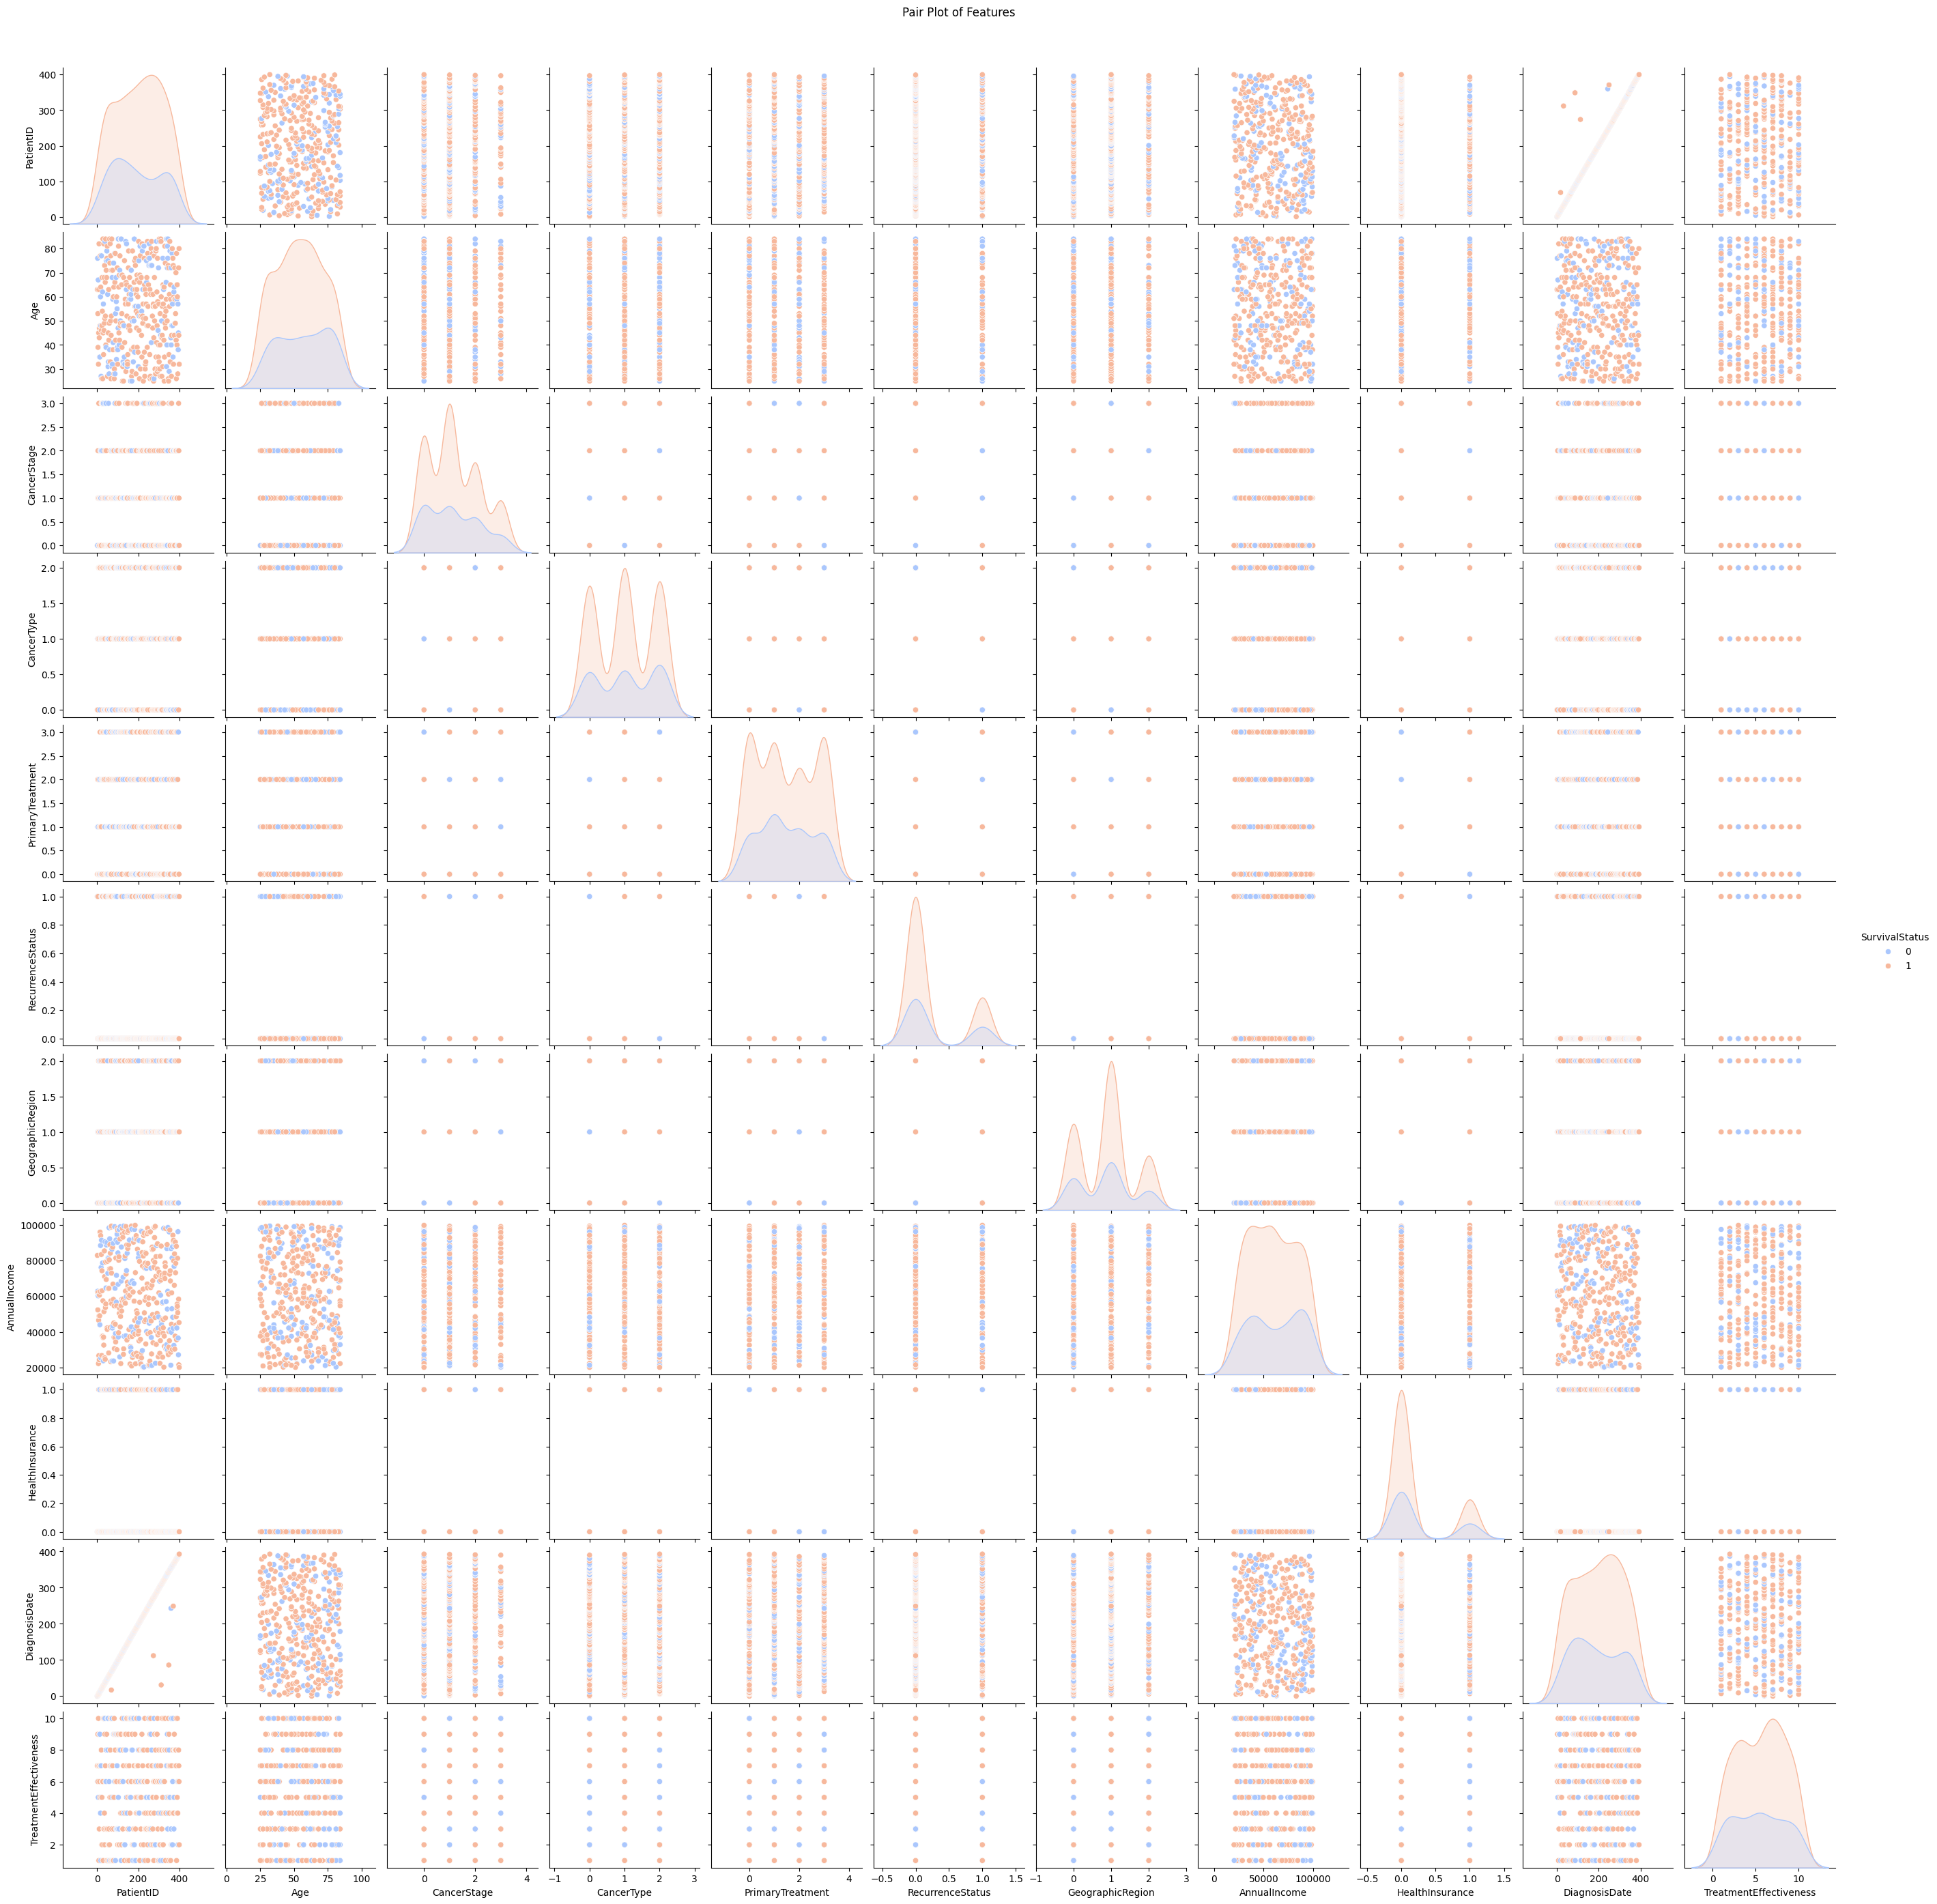

<ipython-input-14-25adc55f6ca2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SurvivalStatus', y='Age', data=df, palette='coolwarm')


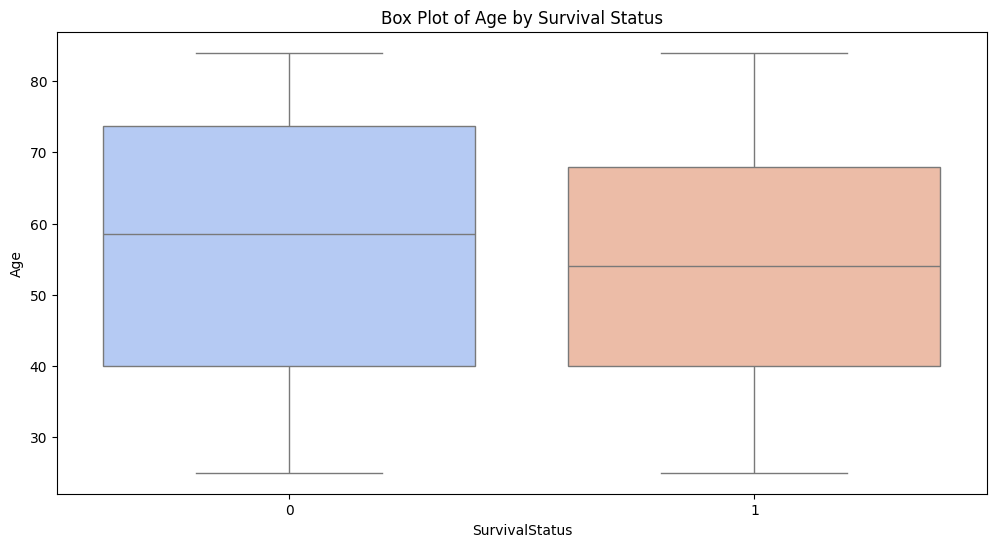

<ipython-input-14-25adc55f6ca2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SurvivalStatus', y='AnnualIncome', data=df, palette='coolwarm')


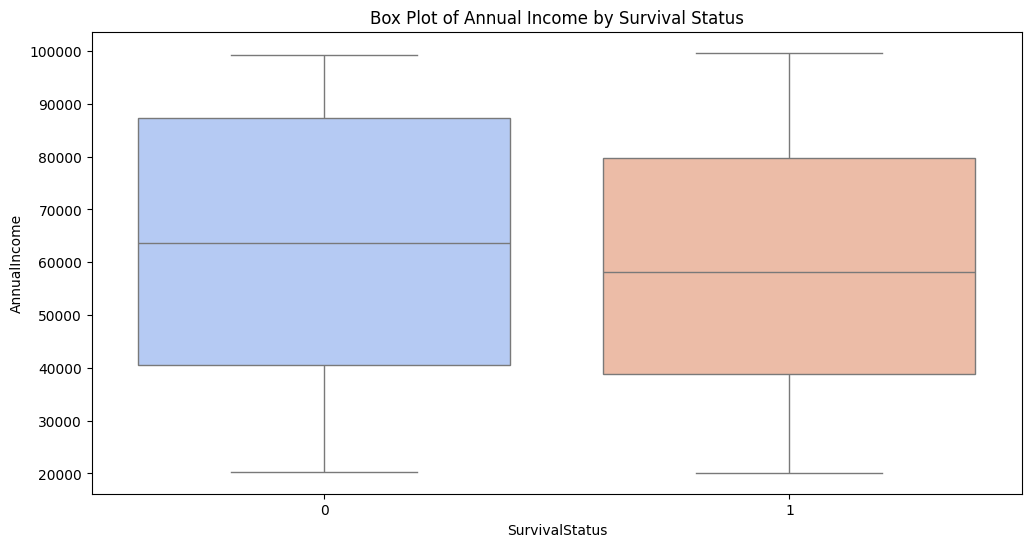

In [14]:
# Pair plot to visualize the relationships between features
sns.pairplot(df, hue='SurvivalStatus', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

# Box plot to compare the distribution of 'Age' and 'AnnualIncome' by 'SurvivalStatus'
plt.figure(figsize=(12, 6))
sns.boxplot(x='SurvivalStatus', y='Age', data=df, palette='coolwarm')
plt.title('Box Plot of Age by Survival Status')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='SurvivalStatus', y='AnnualIncome', data=df, palette='coolwarm')
plt.title('Box Plot of Annual Income by Survival Status')
plt.show()
